# Synthetic data

The aim of this notebook is to illustrate the PCA tool using synthetic data.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from scipy.spatial import distance
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

##### Data creation

In [2]:
# Synthetic data
N = 900
alpha = 25
beta = 10
gamma = 25
mu1 = 10
mu2 = 50
df = pd.DataFrame()
nb_comp = 5
var = 5
targets = ['Set 1', 'Set 2', 'Set 3']
#df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 3, N)
df['age'] = np.round(np.random.uniform(0,100, N))
#df['age'] = np.round(np.random.normal(50, 2, N))
df['particle 1'] =  np.random.normal(10, var,N)
df['particle 2'] =  np.random.normal(mu1, var,N) + np.random.normal(mu2, var,N)
df['desease 1'] = df['particle 1']*alpha + beta*df['age']
df['disease 2'] = df['particle 2']*gamma 

print('Synthetic data')
display(df)

Synthetic data


,age,particle 1,particle 2,desease 1,disease 2
0,92.0,5.160510,52.227890,1049.012755,1305.697242
1,88.0,10.350376,58.751963,1138.759389,1468.799068
2,17.0,7.285942,65.836150,352.148547,1645.903756
3,43.0,19.606702,61.005975,920.167562,1525.149367
4,22.0,4.997129,64.990849,344.928236,1624.771225
...,...,...,...,...,...
895,93.0,12.280243,49.794878,1237.006069,1244.871957
896,12.0,10.758384,63.351219,388.959599,1583.780486
897,93.0,15.624767,50.567230,1320.619176,1264.180750
898,25.0,23.815783,58.590333,845.394576,1464.758334


##### Apply PCA to Data

In [3]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()

# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

After PCA
Singular values: [4.30472395e+01 4.16348192e+01 3.01409523e+01 1.14961309e-14
 8.42292369e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5,label
0,2.142716,-0.011709,1.335144,-2.201004e-15,-2.407636e-16,0.0
1,1.349959,1.193517,0.378555,1.053876e-14,-6.780424e-17,0.0
2,-2.078087,-0.510389,0.161841,2.655041e-16,9.840491e-16,0.0
3,0.226778,0.818977,-1.916038,9.073967e-17,1.746059e-17,0.0
4,-1.941744,-0.661501,0.649154,6.844097e-17,1.837210e-16,0.0
...,...,...,...,...,...,...
895,2.995177,0.334827,-0.036335,-1.566609e-16,3.283649e-16,1.0
896,-1.629591,-0.698966,-0.591587,3.885096e-17,1.817892e-16,1.0
897,3.088030,0.738320,-0.662870,2.868927e-16,-2.404402e-16,1.0
898,0.317607,0.270462,-2.971066,-3.462335e-17,3.086610e-16,1.0


##### Plots

In [4]:
def plot_PCA(comp_1, comp_2):
    
    x = PCA_df.iloc[:,comp_1]
    y = PCA_df.iloc[:,comp_2]

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.25]
    rect_histy = [left_h, bottom, 0.25, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(12, 12))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    targets = ['young', 'old']

    # the scatter plot:
    for idt, _ in enumerate(targets):
        axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,comp_1], 
                   PCA_df[PCA_df['label'] == idt].iloc[:,comp_2])


    # now determine nice limits by hand:
    binwidth = 0.2
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    axHistx.set_xticks([])
    axHisty.set_yticks([])

    axScatter.legend(targets)
    axScatter.grid()
    axScatter.set_xlabel('Component #'+str(comp_1+1), fontsize = 15)
    axScatter.set_ylabel('Component #'+str(comp_2+1), fontsize = 15)
    plt.show()

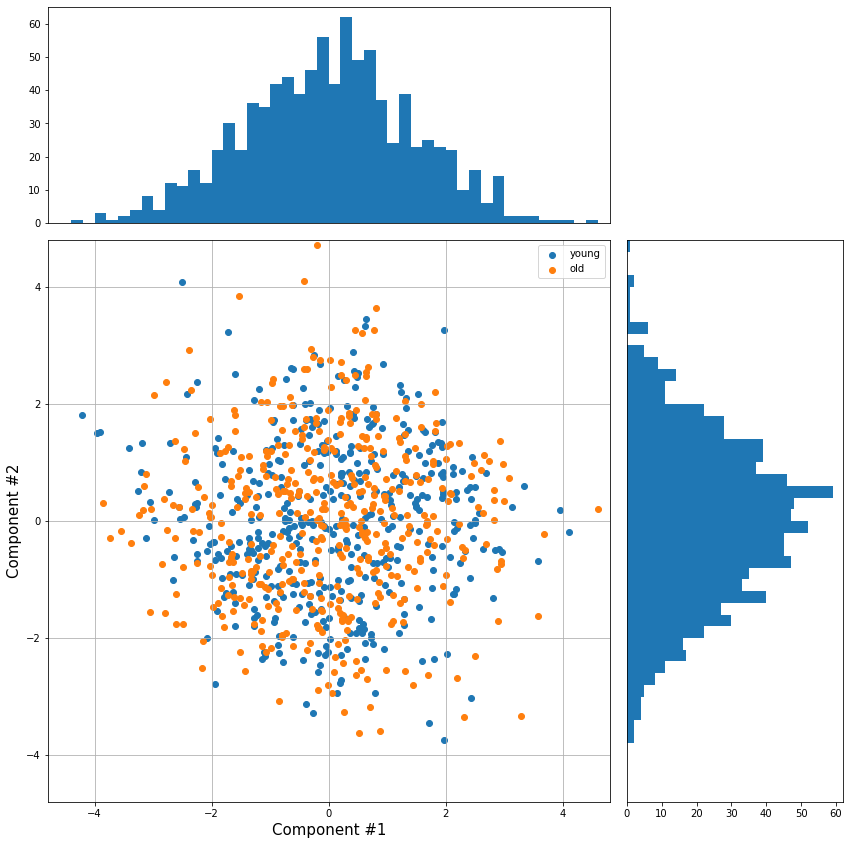

In [5]:
plot_PCA(0,1)

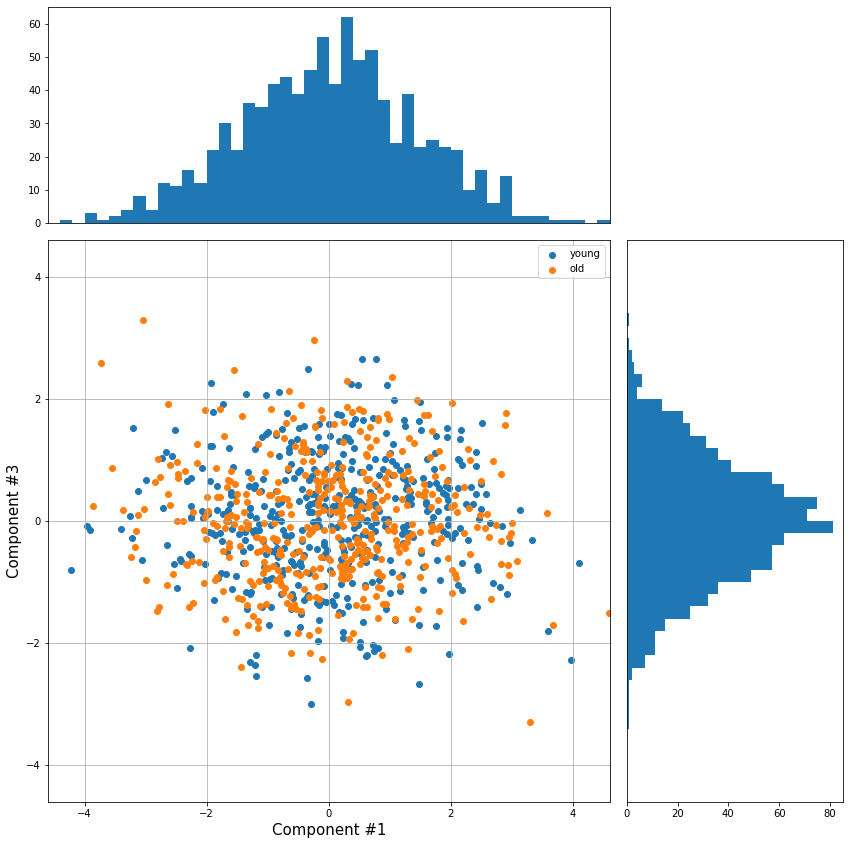

In [6]:
plot_PCA(0,2)

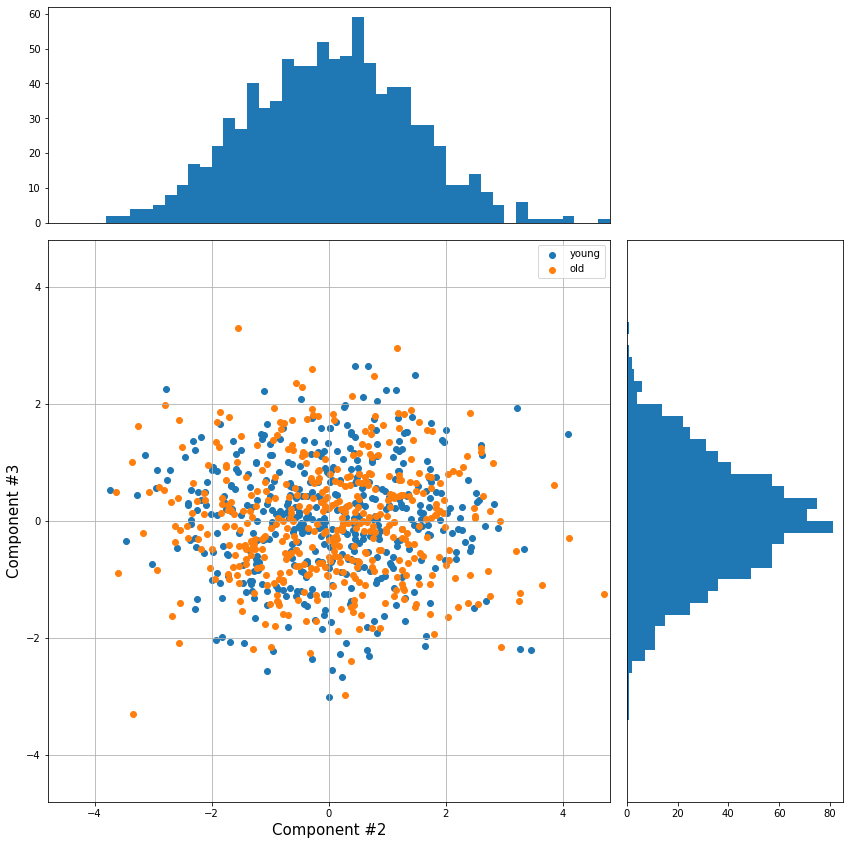

In [7]:
plot_PCA(1,2)

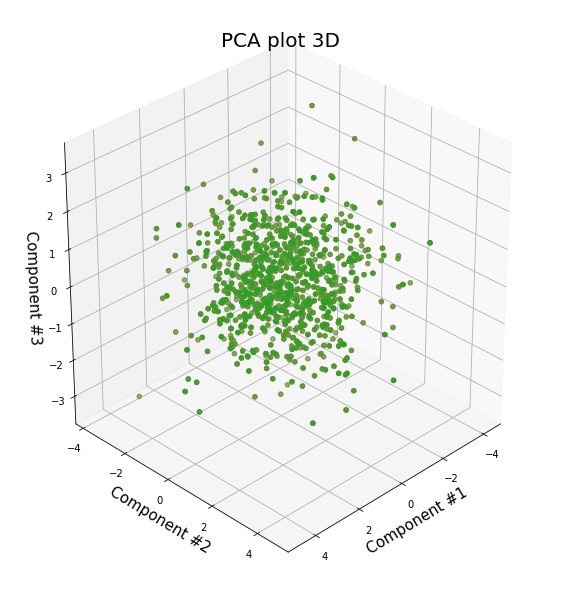

In [8]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)

for idt, _ in enumerate(targets):
    ax.scatter(PCA_df.iloc[:,0], 
               PCA_df.iloc[:,1],
               PCA_df.iloc[:,2])

ax.grid()
ax.set_xlabel(PCA_df.columns[0], fontsize = 15)
ax.set_ylabel(PCA_df.columns[1], fontsize = 15)
ax.set_zlabel(PCA_df.columns[2], fontsize = 15)
ax.set_title('PCA plot 3D', fontsize = 20)
plt.show()

,age,particle 1,particle 2,desease 1,disease 2
0,0.448896,0.126899,-0.531416,0.466458,-0.531416
1,0.479051,0.230264,0.464512,0.534739,0.464512
2,0.375040,-0.924960,0.042731,-0.011923,0.042731
3,-0.653981,-0.274242,0.027677,0.703966,-0.027677
4,0.025618,0.010742,0.706565,-0.027576,-0.706565


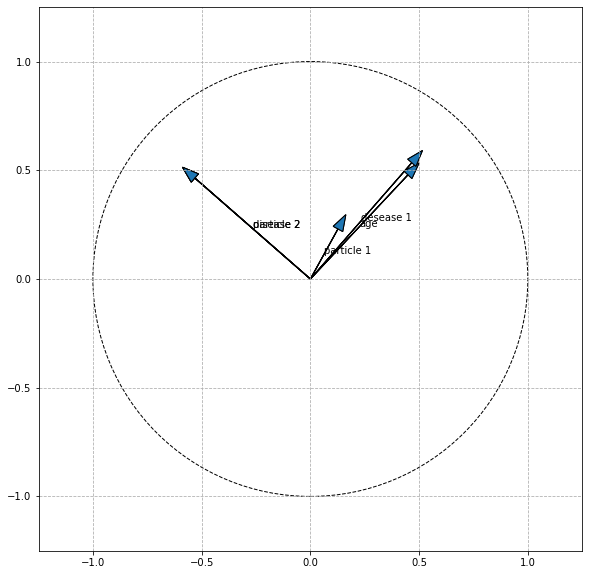

In [11]:
test_df = (df-df.mean())/df.std()
test_df = test_df[test_df.columns[:-1]]

gla = pd.DataFrame(data=[[pca.components_[c,n] for n in range(pca.n_components_)] for c in range(pca.n_components_)],
             index=[0,1,2,3,4],
             columns = test_df.columns)
display(gla)


# Plot

fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in test_df:
    ax.annotate(c, xy=(gla[c][0]/2, gla[c][1]/2))
    ax.add_artist(plt.arrow(0, 0, gla[c][0], gla[c][1], head_width=0.05))
    
ax.set_aspect(1)
plt.grid(linestyle='--')

plt.show()

In [12]:
# Square cosine see: https://biosakshat.github.io/pca.html
gla = pd.DataFrame(data=pca.components_**2, index=[0,1,2,3,4],  columns= test_df.columns)
gla

,age,particle 1,particle 2,desease 1,disease 2
0,0.201508,0.016103,0.282403,0.217583,0.282403
1,0.229490,0.053022,0.215771,0.285946,0.215771
2,0.140655,0.855551,0.001826,0.000142,0.001826
3,0.427691,0.075208,0.000766,0.495568,0.000766
4,0.000656,0.000115,0.499234,0.000760,0.499234


,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079,0.061259


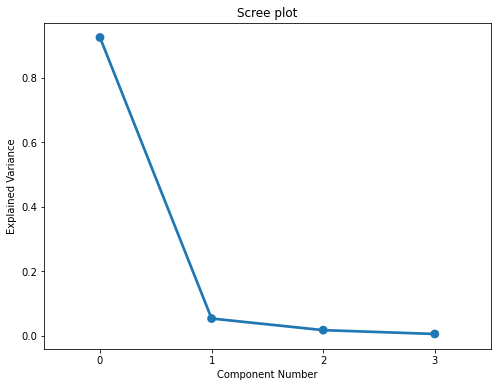

/home/tim/.local/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


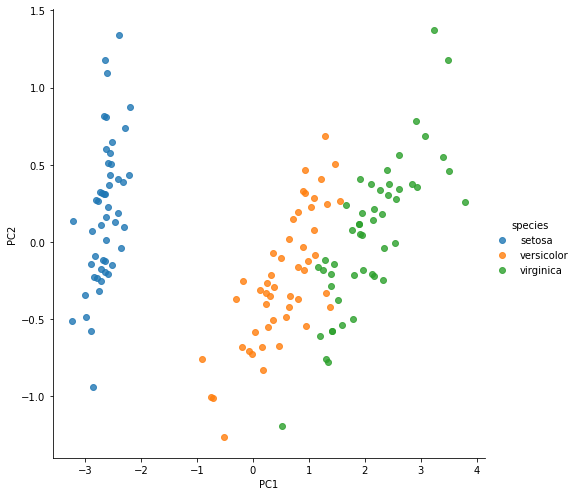

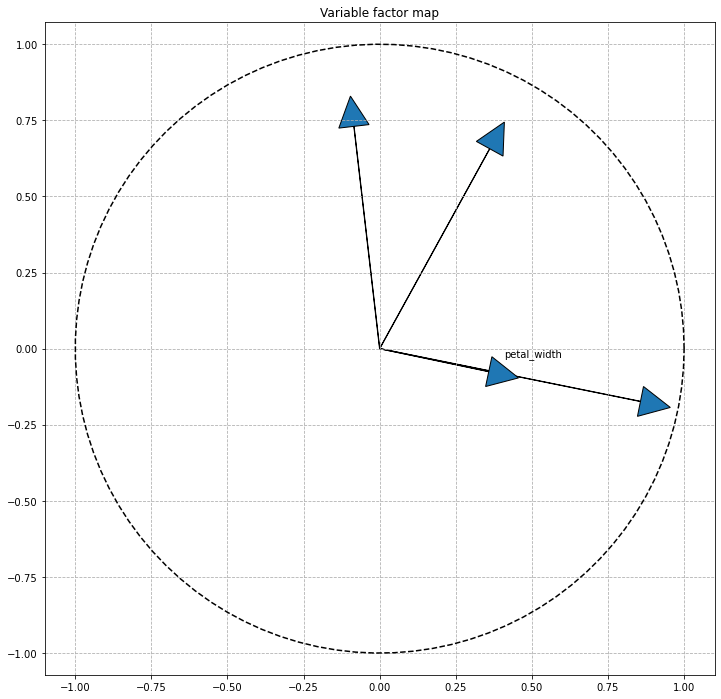

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')

n_components = 4

# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df[['sepal_length', 'sepal_width',
                                'petal_length', 'petal_width']])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               hue='species',data=df,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         df.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an), "k--")  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
ax.set_aspect(1)
plt.grid(linestyle='--')
plt.show()